
---
<p style="text-align: center;">
<font size="5"> <b>Stock portfolio Strategy for recession periods <br>
Markotvitz Approach<b> </font> </p>

---



### Table of contents

1. [Introduction]()
2. [Model]()
3. [Data Wrangling]()<br>
   - Libraries
   - Data Collection
   - Setting Initial Dataframe
4. [Simulations]()
   - Setting the final Dataframe
   - Locating main findings
   - Exploration
5. [Visualizations]()
6. [Conclusions]()
7. [Final Note - Tableau]()


#### 1. Introduction

Its evident that nowadays the economic outlook its getting worse and worse every day. The pandemic effects, thar war tensions and the sharp slowdown in gdp for the main economies has led to stagflation all over the world.
So, considering the increasing possibility of a near future recession, here its proposed a portfolio strategy using stocks that had outperformed in past recessions in order to develop an alternative option for those investors who still want to keep their positions in the stock market without changing to the fixed one in a recession scenery. The strategy was made based on the Markovitz portfolio theory model approach.

#### 2. Model

$$ E(R_{p}) = \sum\limits_{j=1}w_{j}E(R_{i}) $$


$$\small R_{p} = return \ of \ portfolio $$ 
$$\small E_{i} = return \ of \ asset \ i$$ 
$$\small W_{j} = weight \ of \ asset \ j$$ 

<br>

$$ \sigma^{2}_{p} = \sum\limits_{j}w^{2}_{j}\sigma^{2}_{i}+\sum\limits_{j}\sum\limits_{j!=i}w_{i}w_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$

$$\small \sigma^{2}_{p} = portfolio \ variance $$ 
$$\small \rho_{ij} = correlation \ between \ asset \ ij$$ 




#### 3. Data Wrangling

**Libraries**

In [14]:
import pandas_datareader.data as web #To collect data
import datetime as dt #To specify start and end dates
import pandas as pd #To read files or work with dataframes
import matplotlib.pyplot as plt #To visualize
import numpy as np #To get random weights
import seaborn as sns
plt.style.use('fivethirtyeight')

**Data collection**

In [2]:
#Choosing the stock tickers, the time period to get the prices - number of simulations -risk free as zero
#And returns 1 as an empty dataframe to store the prices
tickers = ['WM','MCD','PG','JNJ','HD'] 
start = dt.datetime(2010, 1, 1) 
end = dt.datetime(2020,12,1)

number_of_portfolios = 10000
RF = 0
returns1 = pd.DataFrame 

**Setting initial dataframe**

In [3]:
#Creating a for loop to iterate over the tickers list to extract the prices
for ticker in tickers:
     data = web.DataReader(ticker, 'yahoo', start, end)
     data = pd.DataFrame(data)
     #new column created on the dataframe
     #the new column gets the pct change of the stock 
     data [ticker] = data ['Adj Close'].pct_change()
     
     #Condition to append the first iteration 
     if returns1.empty:
        returns1 = data[[ticker]]
      #Condition to keep inner joining the pct columns to the big dataframe (returns1)
     else:
        returns1 = returns1.join(data[[ticker]], on='Date')

print(returns1.head())

                  WM       MCD        PG       JNJ        HD
Date                                                        
2010-01-04       NaN       NaN       NaN       NaN       NaN
2010-01-05 -0.004391 -0.007646  0.000327 -0.011596  0.007325
2010-01-06 -0.000294 -0.013644 -0.004744  0.008134 -0.003463
2010-01-07  0.002353  0.007323 -0.005423 -0.007137  0.011813
2010-01-08  0.004695 -0.000970 -0.001322  0.003438 -0.004807


In [23]:
#Now, lets create the empty list to append the risk, return, sharpe ratios and weights 
#From the simulation
portfolio_returns = []
portfolio_risk = []
sharpe_ratios = []
portfolio_weights = []

#### 4. Simulations - Monte carlo

In [24]:
for portfolio in range (number_of_portfolios):

    #Weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round(weights / np.sum(weights),2) #to get the sum of weights equal to 1# getting the random weights #
    portfolio_weights.append(weights)
   
    #calculate annualized returns1 (multiplied for 252 in order to get the information for a year, 252 is applied only for stocks)
    annualized_returns = np.sum(returns1.mean() * weights) * 252  # (wi*ri + wi*ri) *252 # get the portfolio return and multiply it by 252 #
    portfolio_returns.append(annualized_returns)
    
    #Matrix Covariance & Portfolio risk calculation
    matrix_covariance = returns1.cov() * 252 #*252 to get the info for a year
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) 
    
    #Portfolio Risk
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

    #SHARPE RATIO
    sharpe_ratio = (annualized_returns - RF) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

**Setting the final dataframe**

In [25]:
#Once the simulation is done, the risk,sharpe,weight and return list are put in a single list
#then that list of metris is turn into a dataframe
#with the proper columns names
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratios = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns,portfolio_risk, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T #ITS KEY to put the .T in order to transpose the data in order to see it #
portfolios_df.columns = ['Return','Risk','Sharpe','Weights'] #ITS KEY to add the columns name to the dataframe #

In [26]:
print(portfolios_df.head())


     Return      Risk    Sharpe                         Weights
0  0.187456  0.163163  1.148886     [0.2, 0.39, 0.1, 0.02, 0.3]
1  0.135818  0.145742  0.931908   [0.07, 0.1, 0.34, 0.45, 0.05]
2  0.162555  0.147096   1.10509    [0.14, 0.21, 0.15, 0.3, 0.2]
3  0.159714  0.149992  1.064814  [0.27, 0.01, 0.23, 0.31, 0.19]
4  0.140384  0.142946  0.982072   [0.17, 0.21, 0.3, 0.31, 0.02]


**Locating Main Findings**

In [27]:
# IDENTIFYING THE PORTFOLIOS WITH MINIMUN RISK, HIGHEST RETURN AND THE HIGHEST SHARPE RATIO 

#locating in the dataframe the row where the risk is minimum 
min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()] 

#locating in the dataframe the row where the return is max and min
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()] 
lowest_return =  portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmin()]

#locating in the dataframe the row where the sharpe is max
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()] 

**Exploration**

In [28]:
#Dataframe info
print(returns1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2010-01-04 to 2020-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WM      2747 non-null   float64
 1   MCD     2747 non-null   float64
 2   PG      2747 non-null   float64
 3   JNJ     2747 non-null   float64
 4   HD      2747 non-null   float64
dtypes: float64(5)
memory usage: 128.8 KB
None


In [29]:
#Anual returns
#print((returns1.mean()*252))
avgreturns = returns1.mean()*252

#Dataframe daily main details
print(returns1.describe())

                WM          MCD           PG          JNJ           HD
count  2747.000000  2747.000000  2747.000000  2747.000000  2747.000000
mean      0.000644     0.000641     0.000482     0.000477     0.001025
std       0.011889     0.012096     0.010849     0.010696     0.014521
min      -0.111212    -0.158753    -0.087373    -0.100378    -0.197938
25%      -0.004375    -0.004579    -0.004373    -0.004180    -0.005378
50%       0.000873     0.000831     0.000479     0.000342     0.000972
75%       0.005960     0.005900     0.005527     0.005695     0.007830
max       0.090500     0.181254     0.120091     0.079977     0.137508


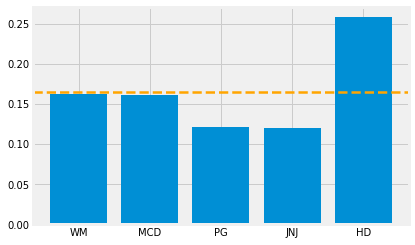

In [12]:
#Annual Returns
plt.bar(returns1.columns, returns1.mean()*252)
#Average Annual return
plt.axhline(avgreturns.mean(), color='Orange', linestyle='--', linewidth = 2.5)
plt.show()

#### 5. Visualization


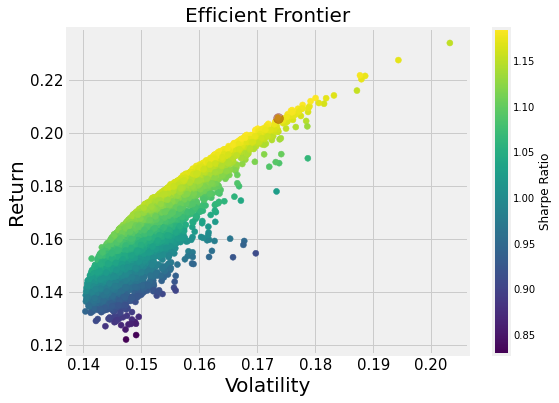

In [11]:

plt.figure (figsize = (8,6))
# c is coloring portfolio return / portfolio risk thats the sharpe ratio
plt.scatter(portfolio_risk,portfolio_returns, c = portfolio_returns / portfolio_risk) 
plt.title('Efficient Frontier', fontsize = 20)
plt.xlabel ('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe Ratio')
#RED DOT AS MAX SHARPE RATIO PORTFOLIO
plt.scatter(highest_sharpe['Risk'],highest_sharpe['Return'], s=100, facecolor='maroon', alpha=0.4)
plt.show()


The efficient frontier plotted above ***is showing the expected results***, it follows the theory and its aligned with the purpose of the strategy. We can see that after ***10000 simulations*** there are plenty of optimal options to choose for investors according to their respective level of risk aversion. Additionally, analyzing the graph and based on the theory its evident that ***the best porftolios to select are in the edge of the curve***, since those combinations of assets get the highest level of return while minimizing the risk at that point.

But, **which portfolio its the best one based on the sharpe ratio metric approach?** <br>
Lets take a look at it.


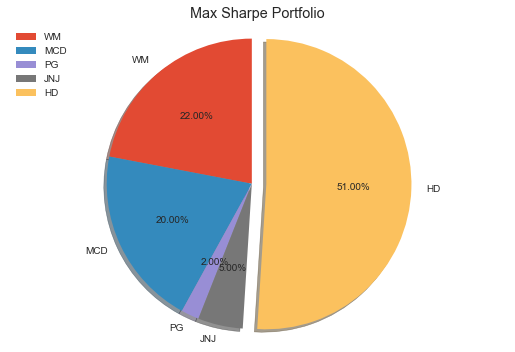

In [31]:
#PLotting the max sharpe portfolio composition
names = ['WM','MCD','PG','JNJ','HD']

explode = [0,0,0,0,0.1]
plt.style.use('ggplot')
plt.title('Max Sharpe Portfolio')
plt.pie(x=highest_sharpe['Weights'], explode = explode, 
        labels = names, autopct='%.2f%%', shadow=True, startangle = 90)
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

Considering the risk-return relationship, the portfolio that add the most excess of return for the extra volatility is the one plotted above. In single terms, the combination of assets shown is the one that compensates the most, since the max sharpe porftolio suggest that at a given combination the excess of return its higher than the relative volatility.

<br>
Now, how the assets behave compared to each other? <br>
Lets see the correlation matix to have a clearer idea of it.


Text(0.5, 1.0, 'Correlation Matrix')

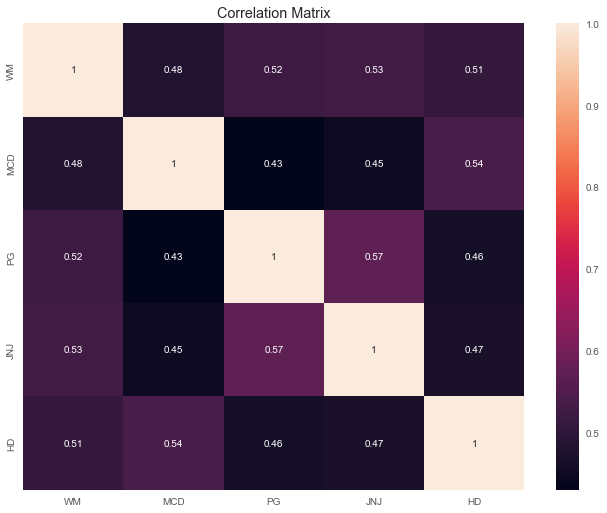

In [32]:

#Dropping the N/As in the first column of the dataframe
Corrdataframe = returns1.iloc[1:, :]

#CORRELATION MATRIX

plt.figure(figsize=(10,8))
plot = sns.heatmap(Corrdataframe.corr().round(2), annot = True)
plt.title('Correlation Matrix')

Given the theoretical base of this strategy, the correlation matrix shows that some selected stocks have similar behavior compared to each other and some others not. According to Markovitz Portfolio theory, choosing assets that add diversification to the portfolio can decrease the portfolio risk without sacrificing the return. Thats why the correlation matrix shows that some stocks are moderately correlated while others are moderately not correlated.<br>

#### 6. Conclusion

All in all, the stocks portfolio strategy using Markovitz portfolio theory combined with the Monte-Carlo **shows the expected results**. The Efficient frontier shows the 10000 generated portfolios, showing the optimal and not optimal ones plus the max sharpe portfolio (red dot) which is the one that offers the highest excess of return considreing the risk.return relation. Its evident that **combining assets can improve performance while decreasing the volatility**.

On the other hand, **adding diversification** is important and should increase the sharpe ratio. However, given the aim of this strategy the assets selected did not present strong correlations or really low correlations, thus **i propose for others to build their portfolios by choosing assets with the mentioned correlations** in order to get a wider view of portfolios to choose the best suited.

#### 7. Final Note [Tableau]

If you might notice, the final dataframe called 'portfolios_df' in the column named 'Weights' the values are nd.array, however, when exported to csv to upload to tableau, the values in that column are treated as strings or text, in the next ipynb i will show you how to wrangle that column in order to fix that problem and create the table to export the top10sharpes.csv table to plot the sharpes in tableau.